<a href="https://colab.research.google.com/github/tingtingting118/PumpitUp/blob/main/Pump_it_up_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Competition and Data description
https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/


**Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed.**


## library import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pd.set_option('display.max_columns', None)

##Upload your file to Colab- Optional##

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
 #or use link from GitHub
url_x = 'https://raw.githubusercontent.com/tingtingting118/PumpitUp/main/Train_X.csv'
data_x = pd.read_csv(url_x)


In [3]:
url_y = 'https://raw.githubusercontent.com/tingtingting118/PumpitUp/main/Train_Y.csv'
data_y = pd.read_csv(url_y)
#data = pd.read_csv("C:/Users/Dhrumel/Desktop/PROJECT/Train_X.csv")

In [194]:
url_test_x = 'https://raw.githubusercontent.com/tingtingting118/PumpitUp/main/Testing_X.csv'
X_testing = pd.read_csv(url_test_x)

In [133]:
data_x.head()

id  amount_tsh  ...              waterpoint_type waterpoint_type_group
0  69572      6000.0  ...           communal standpipe    communal standpipe
1   8776         0.0  ...           communal standpipe    communal standpipe
2  34310        25.0  ...  communal standpipe multiple    communal standpipe
3  67743         0.0  ...  communal standpipe multiple    communal standpipe
4  19728         0.0  ...           communal standpipe    communal standpipe

[5 rows x 40 columns]

In [195]:

#data_y = pd.read_csv("C:/Users/Dhrumel/Desktop/PROJECT/Train_Y.csv")
X_testing.head()

id  amount_tsh  ...     waterpoint_type waterpoint_type_group
0  50785         0.0  ...               other                 other
1  51630         0.0  ...  communal standpipe    communal standpipe
2  17168         0.0  ...               other                 other
3  45559         0.0  ...               other                 other
4  49871       500.0  ...  communal standpipe    communal standpipe

[5 rows x 40 columns]

In [6]:
#combining data for exploration 
data = data_x.merge(data_y,how='inner',on='id')
data.head()

id  amount_tsh  ... waterpoint_type_group    status_group
0  69572      6000.0  ...    communal standpipe      functional
1   8776         0.0  ...    communal standpipe      functional
2  34310        25.0  ...    communal standpipe      functional
3  67743         0.0  ...    communal standpipe  non functional
4  19728         0.0  ...    communal standpipe      functional

[5 rows x 41 columns]

#Data Exploration

In [7]:
#check any missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
data.shape

(59400, 41)

In [9]:
data_y.shape

(59400, 2)

In [10]:
data.describe(include = 'all')

id     amount_tsh  ... waterpoint_type_group status_group
count   59400.000000   59400.000000  ...                 59400        59400
unique           NaN            NaN  ...                     6            3
top              NaN            NaN  ...    communal standpipe   functional
freq             NaN            NaN  ...                 34625        32259
mean    37115.131768     317.650385  ...                   NaN          NaN
std     21453.128371    2997.574558  ...                   NaN          NaN
min         0.000000       0.000000  ...                   NaN          NaN
25%     18519.750000       0.000000  ...                   NaN          NaN
50%     37061.500000       0.000000  ...                   NaN          NaN
75%     55656.500000      20.000000  ...                   NaN          NaN
max     74247.000000  350000.000000  ...                   NaN          NaN

[11 rows x 41 columns]

In [11]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [12]:
data.drop('id',axis=1,inplace=True)
eda_cols = data.select_dtypes(['number']).columns

In [13]:
eda_cols

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')

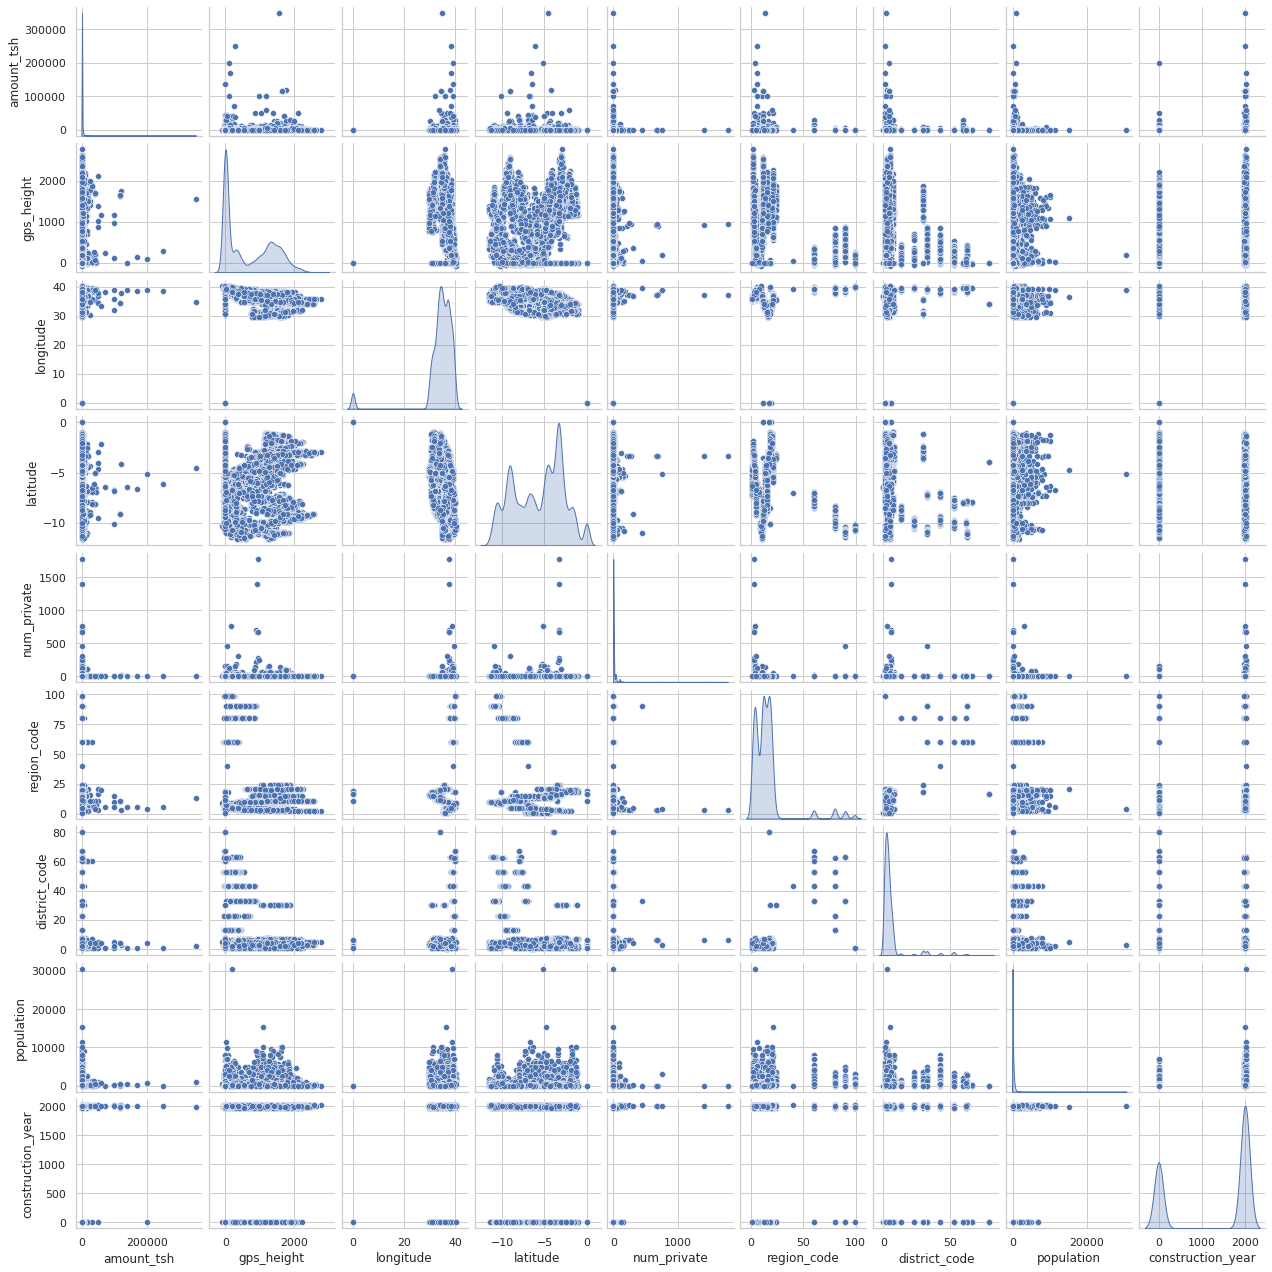

In [ ]:
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(data[eda_cols],height = 2,x_vars= eda_cols,y_vars=eda_cols,diag_kind='kde')
#plt.show()


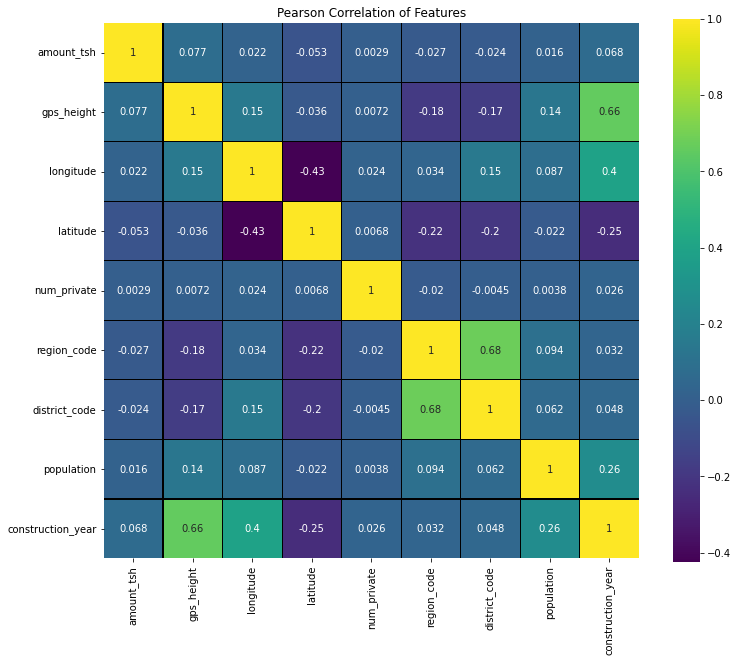

In [14]:
#check correlation between features
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')

# Draw the heatmap using seaborn

sns.heatmap(data.corr(),linewidths=0.25, square=True, cmap =plt.cm.viridis, linecolor='black', annot=True)
plt.show()

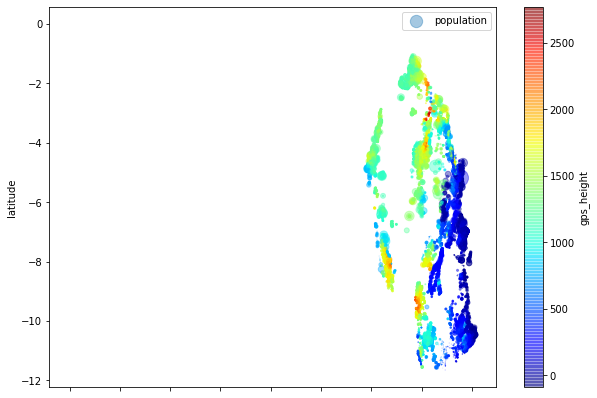

In [15]:
data.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.4, s = data["population"]/100,label="population",figsize = (10,7),c = "gps_height",cmap = plt.get_cmap("jet"),colorbar = True,)
plt.legend()

# s : size of the circle 
# c : color of the point


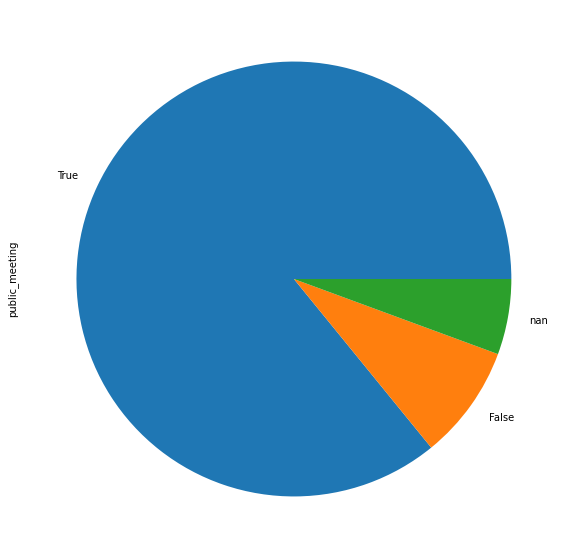

In [19]:
data["public_meeting"].value_counts(dropna = False).plot(kind ="pie",figsize=(10,10))


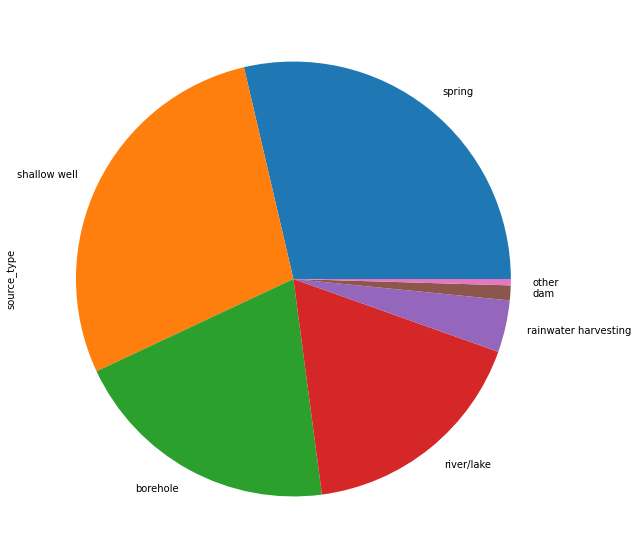

In [20]:
# installer = data['installer']
# insatller.fillna("Missing")
data["source_type"].value_counts().plot(kind ="pie",figsize=(10,10)) 

In [29]:
#data["installer"].value_counts(dropna = False).plot(kind ="pie",figsize=(10,10))
#big installer from DWE
data[data["installer"].isnull()]["installer"].size/ len(data)
#6% of the installer are missing which means that using most frequent installer to impute the missing values might not be a good choice 

0.061531986531986535

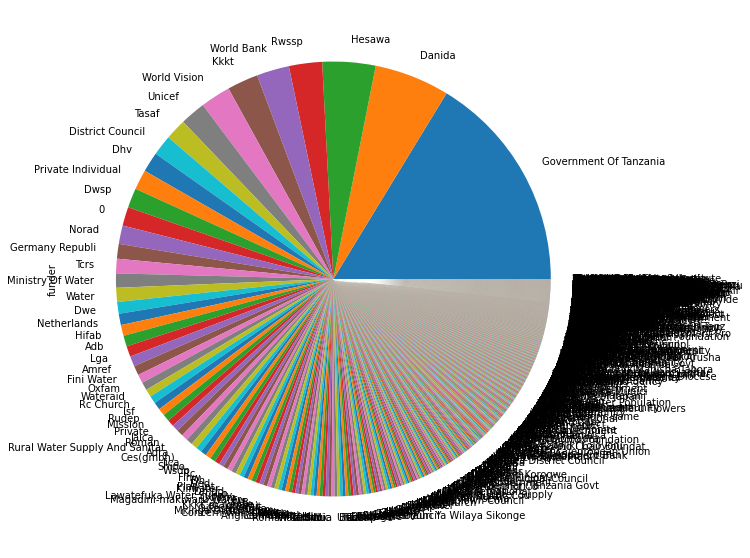

In [ ]:
data["funder"].value_counts().plot(kind ="pie",figsize=(10,10))
#big installer from DWE

0.05612794612794613

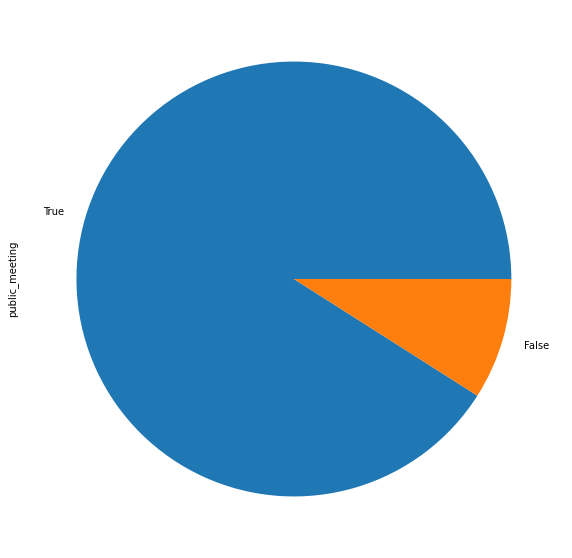

In [30]:
data["public_meeting"].value_counts().plot(kind ="pie",figsize=(10,10))


data[data["public_meeting"].isnull()]["public_meeting"].size/ len(data)
#5.6% (usually we are looking for <5%) of the public meeting are missing
# which means that using most frequent public meeting to impute the missing values might not be a good choice so TBD, need to come back to discuss

In [31]:
#visualization
import plotly.graph_objects as go  #main graphic part
import plotly.express as px #easier graphs
from plotly.subplots import make_subplots # multiple graphs in 1 chart

#Make histograms : "status group", "amount_tsh", "population", "water_quality"
#feel free to change the columns you would like to explore

fig = make_subplots(rows = 2 , cols = 2, subplot_titles = ["status_group", "amount_tsh", "population", "water_quality"])

status_group = go.Histogram(x = data["status_group"], nbinsx = 20, name = "Status Group")
amount_tsh = go.Histogram(x = data["amount_tsh"], nbinsx = 20, name = "Total static head ")
population = go.Histogram(x = data["population"], nbinsx = 20, name = "population")
water_quality = go.Histogram(x = data["water_quality"], nbinsx = 20, name = "water quality")

fig.add_trace(status_group, 1, 1)
fig.add_trace(amount_tsh , 1, 2)
fig.add_trace(population, 2, 1)
fig.add_trace(water_quality, 2, 2)

fig.update_layout(showlegend = False)
fig.show()

# Data Cleaning

In [146]:
#missing values / pick columns that you think it's relevant
data_x.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [196]:
X_testing.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [197]:
#drop irrelvant columns 
cols_to_drop = ["id","extraction_type_group","extraction_type","date_recorded","gps_height","lga","ward","num_private","subvillage","source_class","source", "quality_group","waterpoint_type_group","wpt_name","scheme_name","management","recorded_by","payment_type","quantity_group"]
X_training = data_x.drop(columns = cols_to_drop)
cols_to_drop.remove("id")
#print(cols_to_drop)
X_testing = X_testing.drop(columns = cols_to_drop)

In [198]:
X_testing.head()

id  amount_tsh  ...           source_type     waterpoint_type
0  50785         0.0  ...  rainwater harvesting               other
1  51630         0.0  ...                spring  communal standpipe
2  17168         0.0  ...  rainwater harvesting               other
3  45559         0.0  ...          shallow well               other
4  49871       500.0  ...                spring  communal standpipe

[5 rows x 22 columns]

Split into Train and Test data sets if needed

In [104]:
# divide into train and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     data_new.drop(columns = ["status_group"]), # predictors
#     data_new.status_group, # target
#     test_size=0.3,
#     random_state=0)

# X_train.shape, X_test.shape

((41580, 21), (17820, 21))

#impute missing values#

In [199]:
#check missing values summary
X_training.isnull().mean()


#we noticed that funder, installer, public meeting, permit, scheme_management contains >5% of missing values 

amount_tsh               0.000000
funder                   0.061195
installer                0.061532
longitude                0.000000
latitude                 0.000000
basin                    0.000000
region                   0.000000
region_code              0.000000
district_code            0.000000
population               0.000000
public_meeting           0.056128
scheme_management        0.065269
permit                   0.051448
construction_year        0.000000
extraction_type_class    0.000000
management_group         0.000000
payment                  0.000000
water_quality            0.000000
quantity                 0.000000
source_type              0.000000
waterpoint_type          0.000000
dtype: float64

In [200]:
X_testing.isnull().mean()

id                       0.000000
amount_tsh               0.000000
funder                   0.058519
installer                0.059057
longitude                0.000000
latitude                 0.000000
basin                    0.000000
region                   0.000000
region_code              0.000000
district_code            0.000000
population               0.000000
public_meeting           0.055286
scheme_management        0.065253
permit                   0.049630
construction_year        0.000000
extraction_type_class    0.000000
management_group         0.000000
payment                  0.000000
water_quality            0.000000
quantity                 0.000000
source_type              0.000000
waterpoint_type          0.000000
dtype: float64

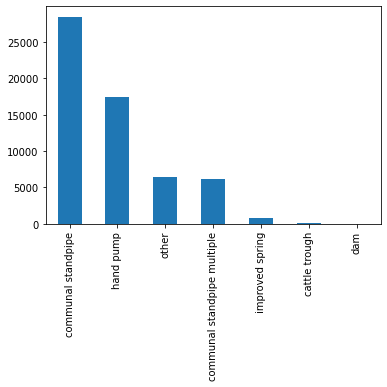

In [201]:
#X_train["public_meeting"].value_counts(dropna = False).sort_values(ascending = False).plot.bar()
#most frequent value = True for public_meeting feature
#X_train["public_meeting"].mode()


X_training["waterpoint_type"].value_counts(dropna = False).sort_values(ascending = False).plot.bar()

In [ ]:
#use X_train to check for exploration only
# X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
#     data_new, # predictors
#     data_new.status_group, # target
#     test_size=0.3,
#     random_state=0)

#X_train_e.shape, X_test_e.shape
#now check the target variable distribution 
#fig = plt.figure()
#ax = fig.add_subplot(111)

# select and plot instances with the most frequent label
#X_train_e[X_train_e['public_meeting']==True]['status_group'].value_counts().plot.bar()

# select and plot instances with missing data in the variable
#X_train_e[X_train['public_meeting'].isnull()]['status_group'].plot.bar(ax=ax, color='red')

# add the legend
#lines, labels = ax.get_legend_handles_labels()
#labels = ['Status with public meeting', 'Status w/o public meeting']
#ax.legend(lines, labels, loc='best')

# add figure title
#plt.title('Public Meeting')

In [153]:
fig  = go.Figure([go.Histogram(x= data_new[data_new['public_meeting']==True]['status_group'], name = 'Status with public meeting'),
                  go.Histogram(x = data_new[data_new['public_meeting'].isnull()]['status_group'], name = 'Status with missing public_meeting')])

fig.update_layout(barmode = "group")
fig.update_layout(title ="Compare status with public meeting and with the missing values for public meeting")
fig.show()

#for those data with missing values in public meeting, we noticed that there are slightly more "non-functional" than those "functional" which is the opposite for those record with public meeting, 
#therefore, we might not be able to use most frequent (public_meeting = True) to impute the missing values

In [155]:
fig  = go.Figure([go.Histogram(x= data_new[data_new['permit']==True]['status_group'], name = 'Status with permit'),
                  go.Histogram(x = data_new[data_new['permit'].isnull()]['status_group'], name = 'Status with missing permi value')])

fig.update_layout(barmode = "group")
fig.update_layout(title ="Compare status with permit and with the missing values for permit")
fig.show()

#using most frequent category : permit = True to impute the missing values for permit may work in this case

In [156]:
fig  = go.Figure([go.Histogram(x= data_new[~data_new['installer'].isnull()]['status_group'], name = 'Status with installer name'),
                  go.Histogram(x = data_new[data_new['permit'].isnull()]['status_group'], name = 'Status w/o installer name')])

fig.update_layout(barmode = "group")
#fig.update_layout(title ="Compare status with permit and with the missing values for permit")
fig.show()

#using most frequent category : permit = True to impute the missing values for permit may work in this case

In [202]:
#impute the data set by using most frequent but feel free to change for other imputation methods
#funder, installer,scheme_management,permit
cols_with_missing = ["funder","installer", "scheme_management","permit","public_meeting"]
for col in cols_with_missing:
  X_training[col].fillna(X_train[col].mode().iloc[0], inplace =True)
  X_testing[col].fillna(X_test[col].mode().iloc[0], inplace = True)






In [203]:
#double check if all missing values have been imputed
#X_training.isnull().mean()
X_testing.isnull().mean()

id                       0.0
amount_tsh               0.0
funder                   0.0
installer                0.0
longitude                0.0
latitude                 0.0
basin                    0.0
region                   0.0
region_code              0.0
district_code            0.0
population               0.0
public_meeting           0.0
scheme_management        0.0
permit                   0.0
construction_year        0.0
extraction_type_class    0.0
management_group         0.0
payment                  0.0
water_quality            0.0
quantity                 0.0
source_type              0.0
waterpoint_type          0.0
dtype: float64

# Feature Engineering

##Rare category Group##


In [205]:
multi_cat_cols = []

for col in X_training.columns:

    if X_training[col].dtypes =='O': # if variable  is categorical
    
        if X_training[col].nunique() > 8: # and has more than 10 categories
            
            multi_cat_cols.append(col)  # add to the list
            
            #print(X_train.groupby(col)[col].count()/ len(X_train)) # and print the percentage of observations within each category
            print(X_training[col].value_counts(normalize=True))
            print()

Government Of Tanzania     0.152929
Rare                       0.061195
Danida                     0.052424
Hesawa                     0.037071
Rwssp                      0.023131
                             ...   
Regina Group               0.000017
Boazi                      0.000017
Rotary                     0.000017
Njula                      0.000017
Kindoroko Water Project    0.000017
Name: funder, Length: 1898, dtype: float64

DWE                          0.292963
Rare                         0.061532
Government                   0.030724
RWE                          0.020303
Commu                        0.017845
                               ...   
Maliasili                    0.000017
maendeleo ya jamii           0.000017
desk and chair foundation    0.000017
Juma Ndege                   0.000017
Singida yetu                 0.000017
Name: installer, Length: 2146, dtype: float64

Lake Victoria              0.172525
Pangani                    0.150505
Rufiji                 

In [206]:
multi_cat_cols = []

for col in X_testing.columns:

    if X_testing[col].dtypes =='O': # if variable  is categorical
    
        if X_testing[col].nunique() > 8: # and has more than 10 categories
            
            multi_cat_cols.append(col)  # add to the list
            
            #print(X_train.groupby(col)[col].count()/ len(X_train)) # and print the percentage of observations within each category
            print(X_testing[col].value_counts(normalize=True))
            print()

Government Of Tanzania         0.149158
Rare                           0.058519
Danida                         0.053401
Hesawa                         0.039057
World Bank                     0.023704
                                 ...   
Hesaw                          0.000067
The Desk And Chair Foundati    0.000067
Wfp/tnt                        0.000067
Dioce                          0.000067
Kerebuka                       0.000067
Name: funder, Length: 981, dtype: float64

DWE               0.292862
Rare              0.059057
Government        0.030774
RWE               0.019663
Commu             0.019327
                    ...   
DESK              0.000067
George Hekwe      0.000067
Omari Abdallah    0.000067
Kiliflora         0.000067
Tassaf            0.000067
Name: installer, Length: 1092, dtype: float64

Lake Victoria              0.176633
Pangani                    0.148350
Rufiji                     0.135421
Internal                   0.125051
Lake Tanganyika            0.

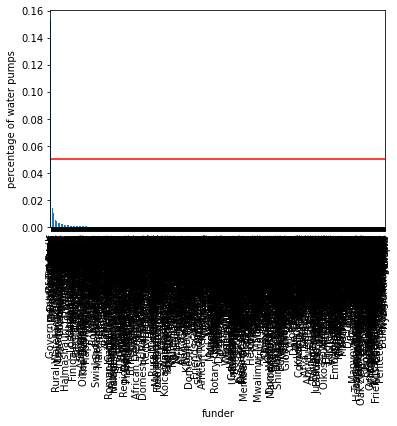

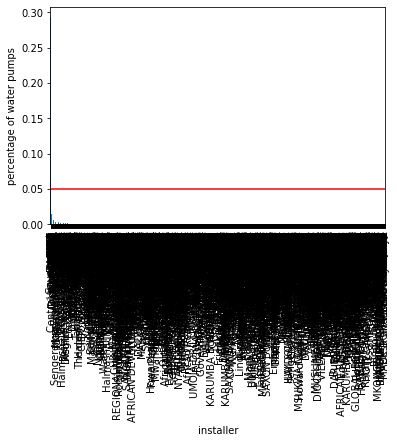

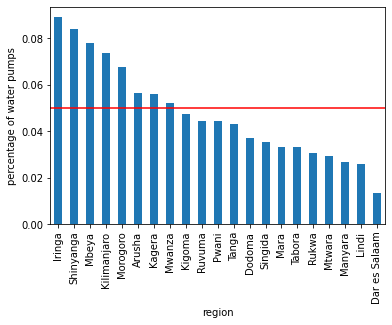

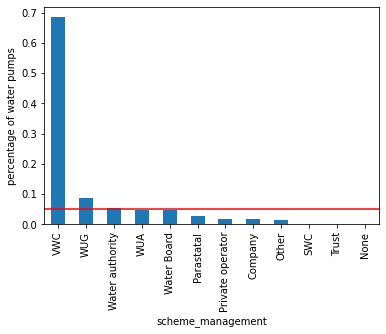

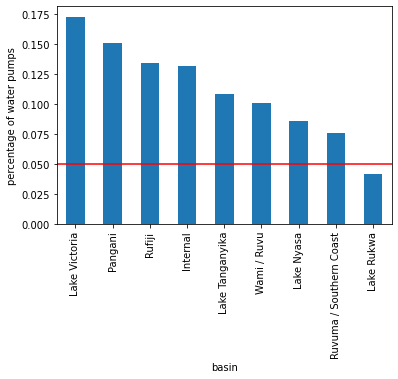

In [207]:
cols_to_rare = ["funder", "installer", "region","scheme_management","basin"]
#"waterpoint_type","source_type","water_quality","payment","extraction_type_class"]

for col in cols_to_rare:

    temp_df = pd.Series(X_training[col].value_counts(normalize = True) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('percentage of water pumps')
    plt.show()

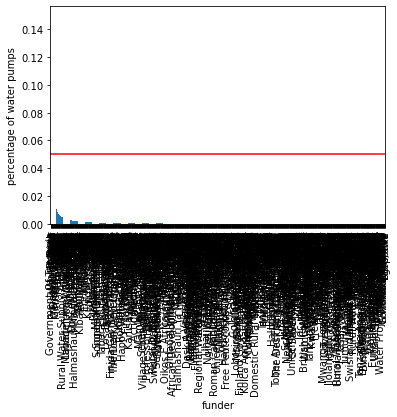

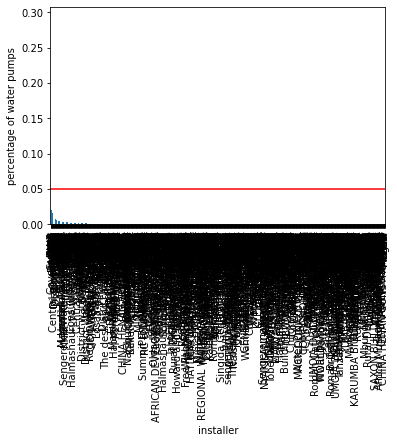

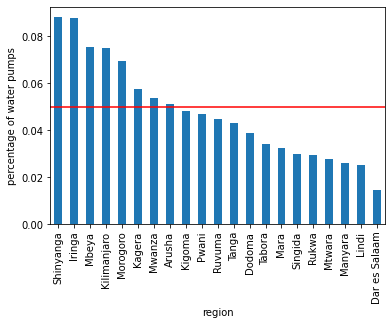

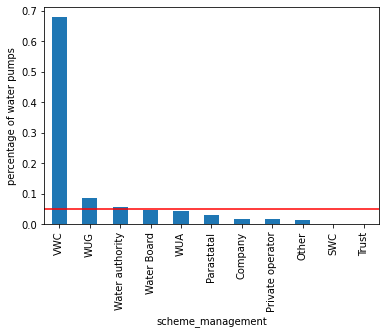

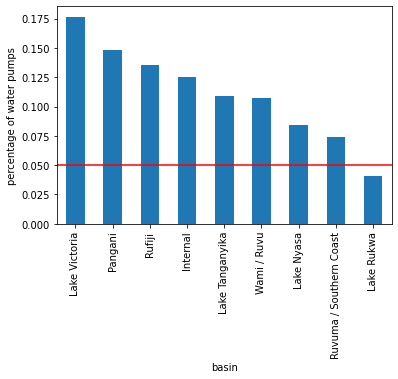

In [208]:
cols_to_rare = ["funder", "installer", "region","scheme_management","basin"]
#"waterpoint_type","source_type","water_quality","payment","extraction_type_class"]

for col in cols_to_rare:

    temp_df = pd.Series(X_testing[col].value_counts(normalize = True) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('percentage of water pumps')
    plt.show()

In [209]:
def find_non_rare_labels(df, feature, tolerence):
  #temp = df.groupby([feature])[feature].count() / len(data_new)
  temp = df[feature].value_counts(normalize = True)
  non_rare = [x for x in temp.loc[temp >tolerence].index.values]
  print("non rare group for feature is: {}  ".format(non_rare))
  return (non_rare)


#check on funder 
#find_non_rare_labels(X_train,"region",0.02)


In [210]:
#find_non_rare_labels(X_train,"scheme_management",0.05)
#find_non_rare_labels(X_train,"funder",0.03)
#['Government Of Tanzania', 'Danida', 'Hesawa']
find_non_rare_labels(X_training,"installer",0.02)
#['DWE', 'Government']

non rare group for feature is: ['DWE', 'Rare', 'Government', 'RWE']  


['DWE', 'Rare', 'Government', 'RWE']

In [211]:
#Now change them to rare label 
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [212]:
X_train, X_test = rare_encoding(X_training, X_testing, "region", 0.05)
X_train, X_test = rare_encoding(X_train, X_test, "scheme_management", 0.04)

non rare group for feature is: ['Iringa', 'Shinyanga', 'Mbeya', 'Kilimanjaro', 'Morogoro', 'Arusha', 'Kagera', 'Mwanza']  
non rare group for feature is: ['VWC', 'WUG', 'Water authority', 'WUA', 'Water Board']  


In [213]:
X_train, X_test = rare_encoding(X_train, X_test, "funder", 0.03)
X_train, X_test = rare_encoding(X_train, X_test, "installer", 0.02)

non rare group for feature is: ['Government Of Tanzania', 'Rare', 'Danida', 'Hesawa']  
non rare group for feature is: ['DWE', 'Rare', 'Government', 'RWE']  


In [ ]:
#cols = ["waterpoint_type","source_type","water_quality","payment","extraction_type_class"]
#for col in cols:
  #X_train, X_test = rare_encoding(X_train, X_test, col, 0.05)


In [214]:
X_train.head()

amount_tsh funder  ...           source_type              waterpoint_type
0      6000.0   Rare  ...                spring           communal standpipe
1         0.0   Rare  ...  rainwater harvesting           communal standpipe
2        25.0   Rare  ...                   dam  communal standpipe multiple
3         0.0   Rare  ...              borehole  communal standpipe multiple
4         0.0   Rare  ...  rainwater harvesting           communal standpipe

[5 rows x 21 columns]

In [215]:
X_test.head()

id  amount_tsh  ...           source_type     waterpoint_type
0  50785         0.0  ...  rainwater harvesting               other
1  51630         0.0  ...                spring  communal standpipe
2  17168         0.0  ...  rainwater harvesting               other
3  45559         0.0  ...          shallow well               other
4  49871       500.0  ...                spring  communal standpipe

[5 rows x 22 columns]

##**One-hot encoding on all categorical features**##

In [216]:
# for one hot encoding with feature-engine
#from feature_engine.encoding import OneHotEncoder
x_train = pd.get_dummies(X_train, drop_first = True)
x_train.head()

amount_tsh  ...  waterpoint_type_other
0      6000.0  ...                      0
1         0.0  ...                      0
2        25.0  ...                      0
3         0.0  ...                      0
4         0.0  ...                      0

[5 rows x 75 columns]

# Feature Selection / Transformation

In [217]:
#transform X_test for model testing
x_test = pd.get_dummies(X_test, drop_first = True)
x_test.head()


id  amount_tsh  ...  waterpoint_type_improved spring  waterpoint_type_other
0  50785         0.0  ...                                0                      1
1  51630         0.0  ...                                0                      0
2  17168         0.0  ...                                0                      1
3  45559         0.0  ...                                0                      1
4  49871       500.0  ...                                0                      0

[5 rows x 76 columns]

In [218]:
x_train.shape

(59400, 75)

In [219]:
x_test.shape

(14850, 76)

In [ ]:
#[x for x in list(x_train.columns) if x not in list(x_test.columns)]

# Modeling

In [253]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [221]:

#data_y.drop(columns = ["id"], inplace = True)
data_y.head()

status_group
0      functional
1      functional
2      functional
3  non functional
4      functional

**random forest**

In [222]:
rfc = RandomForestClassifier()
cross_val_score(rfc, x_train,data_y.values.ravel(), cv=5).mean()

0.7990235690235691

In [223]:
rfc.fit(x_train, data_y.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [225]:
rfc_y_predict = rfc.predict(x_test.drop(columns = ["id"]))


**GradientDescent Boosting Tree**

In [255]:
clf = GradientBoostingClassifier()
clf.fit(x_train, data_y.values.ravel())

gb_tree_y_predict = clf.predict(x_test.drop(columns = ["id"]))

In [256]:
cross_val_score(clf, x_train,data_y.values.ravel(), cv=5).mean()

0.7514814814814815

**XGBoost**

In [231]:
xgbc = XGBClassifier()
cross_val_score(xgbc, x_train, data_y.values.ravel(), cv=5).mean()

0.7457744107744108

**Hyper-parameter tuning**

In [233]:
from sklearn.model_selection import GridSearchCV

In [248]:
params = {'n_estimators':range(100,1100,200), 'max_depth':range(2,7)}
          
          #'max_features' : ['auto', 'sqrt'] \
          #,'min_samples_split': [2, 5, 10],'min_samples_leaf':[1,2,4]}

In [249]:
rfc_tunning = RandomForestClassifier()
gs_rfc = GridSearchCV(rfc_tunning, params, n_jobs = -1, cv=5, verbose=1)
gs_rfc.fit(x_train, data_y.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 20.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [251]:
print(gs_rfc.best_score_, gs_rfc.best_params_)

0.7027272727272728 {'max_depth': 6, 'n_estimators': 300}


**output for submission**

In [226]:
rfc_submission = pd.DataFrame({"id":x_test["id"], "status_group":rfc_y_predict})

In [230]:
#find in your folder
#drop the index column
rfc_submission.to_csv("rf_submission.csv",index= False)

In [257]:
gb_tree_submission = pd.DataFrame({"id":x_test["id"], "status_group":gb_tree_y_predict})
gb_tree_submission.to_csv("gb_tree.csv")

In [252]:
gs_rfc_y_predict = gs_rfc.predict(x_test.drop(columns = ["id"]))
gs_rfc_submission = pd.DataFrame({"id":x_test["id"], "status_group":gs_rfc_y_predict})
gs_rfc_submission.to_csv("gs_rfc_submission.csv",index = False)
#this result in 0.704 accuracy only, which is closer to our score from the above,might be overfitting from the tunning